# Модуль 1
-------------------

In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Алгоритмы кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

### 1.1 Парсинг данных

In [11]:
df1 = pd.read_csv('data/3 вар/Data/train_2.csv', delimiter=';', low_memory=False)
df1

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0


In [5]:
df2 = pd.read_csv('data/3 вар/Data/train_1.csv', delimiter=';', low_memory=False)
df2

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


In [8]:
df["INCOME_MAIN_AMT"] = df["INCOME_MAIN_AMT"].astype(str).str.replace(",", ".").astype(float)

<AxesSubplot:>

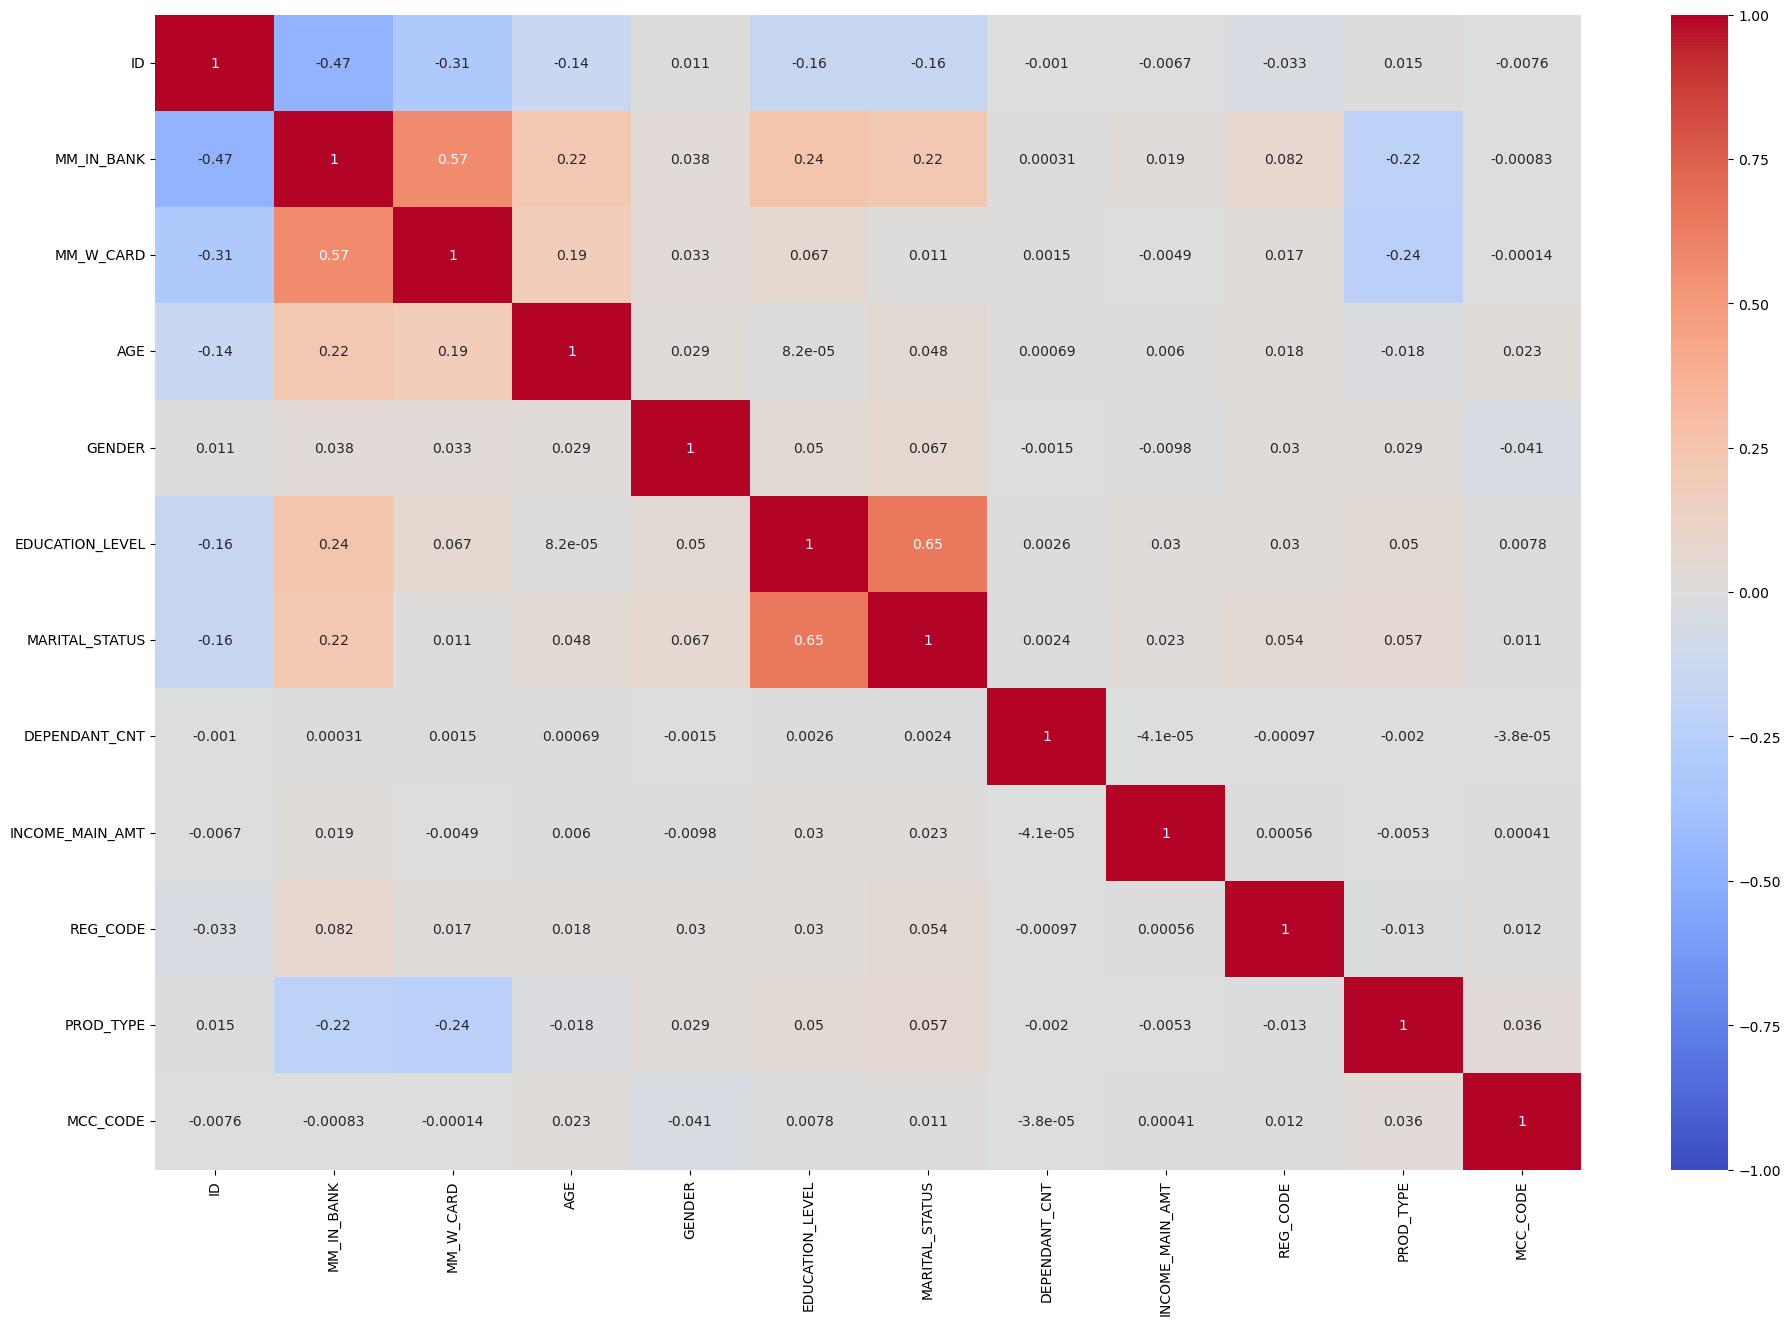

In [9]:
plt.figure(figsize=(23, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:<br>
MATIRIAL_STATUS и EDUCATION_LEVEL<br>
EDUCATION_LEVEL и DEPENDANT_CNT<br>
MM_W_CARD и MM_IN_BANK<br>
ID и MM_IN_BANK<br>

In [8]:
df = df[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE']]
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE
0,35,2,3,3,87000.0,9.0
1,34,2,3,3,180000.0,31.0
2,35,1,1,3,61000.0,38.0
3,38,1,5,3,318000.0,42.0
4,39,1,-1,3,34000.0,81.0
...,...,...,...,...,...,...
199995,42,2,3,3,60000.0,62.0
199996,37,2,-1,4,68000.0,40.0
199997,44,2,1,1,58000.0,26.0
199998,31,2,-1,-1,NaN,79.0


### 1.3 Предварительная обработка данных  

In [9]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\spa-a\AppData\Local\Temp\ipykernel_4052\3528310598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE
0,35,2,3,3,87000.0,9.0
1,34,2,3,3,180000.0,31.0
2,35,1,1,3,61000.0,38.0
3,38,1,5,3,318000.0,42.0
4,39,1,-1,3,34000.0,81.0
...,...,...,...,...,...,...
103719,40,1,-1,-1,30000.0,32.0
103720,42,2,3,3,60000.0,62.0
103721,37,2,-1,4,68000.0,40.0
103722,44,2,1,1,58000.0,26.0


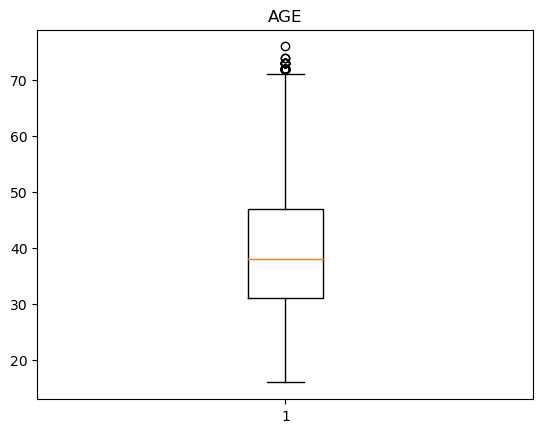

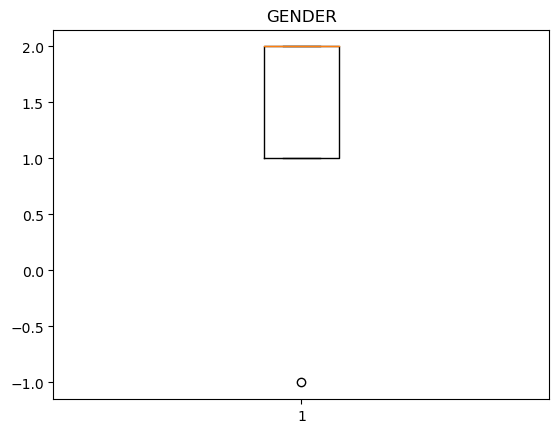

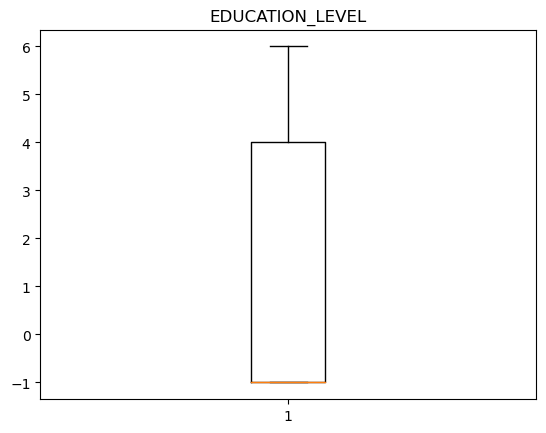

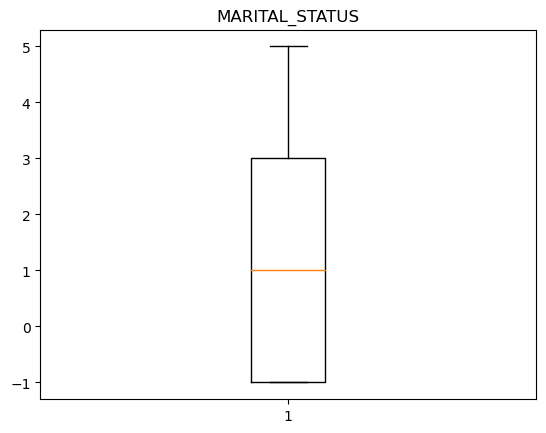

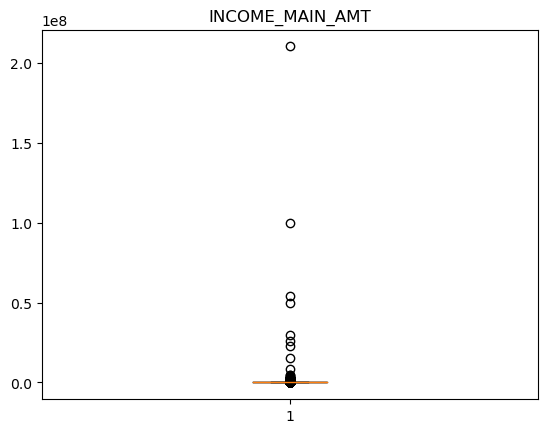

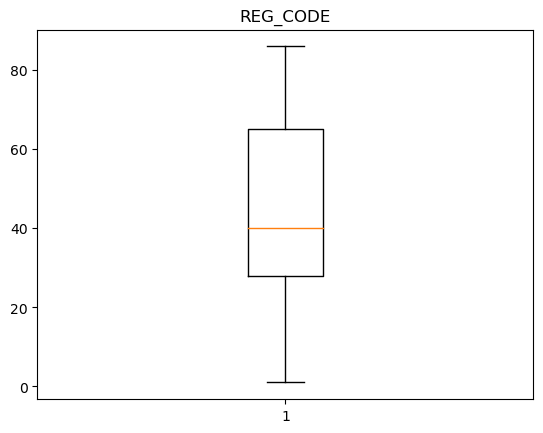

In [11]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


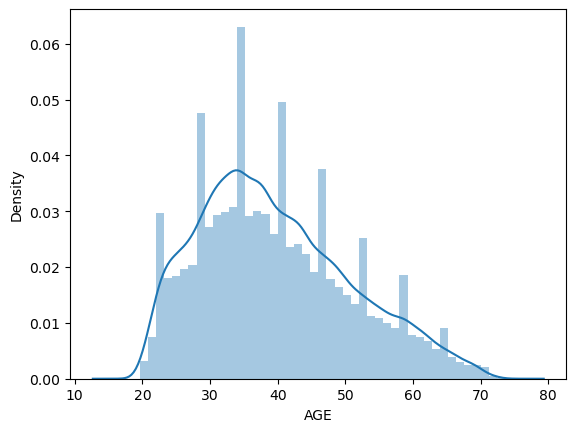

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


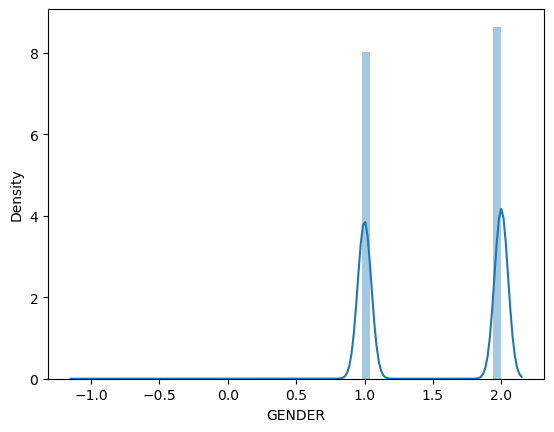

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


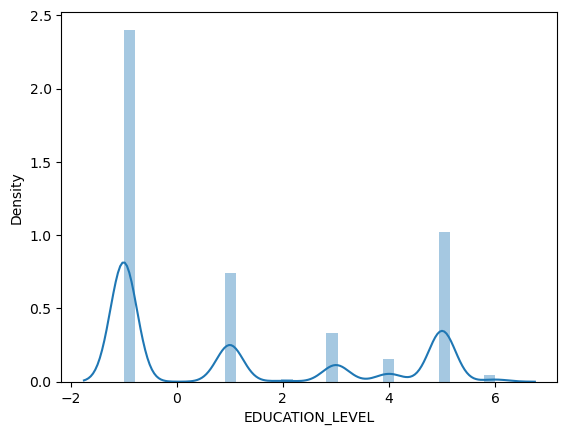

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


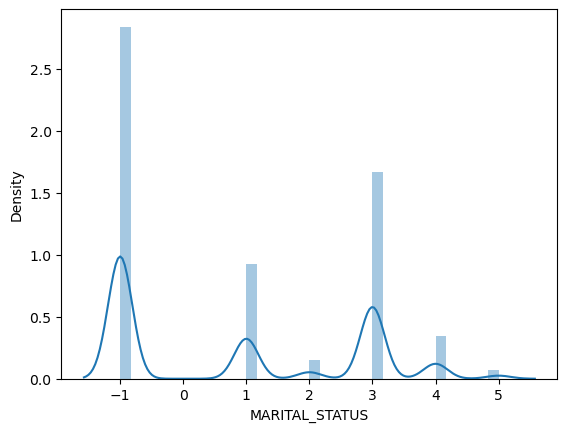

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


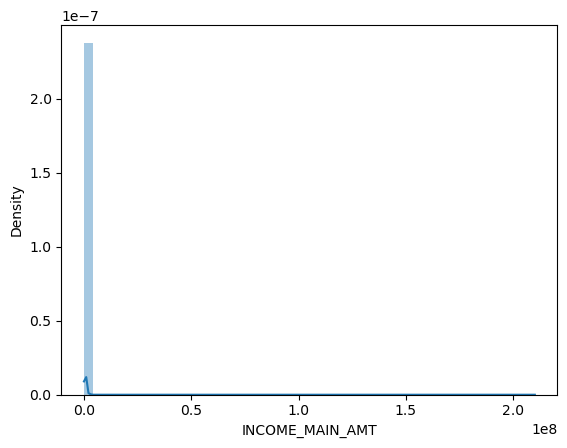

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


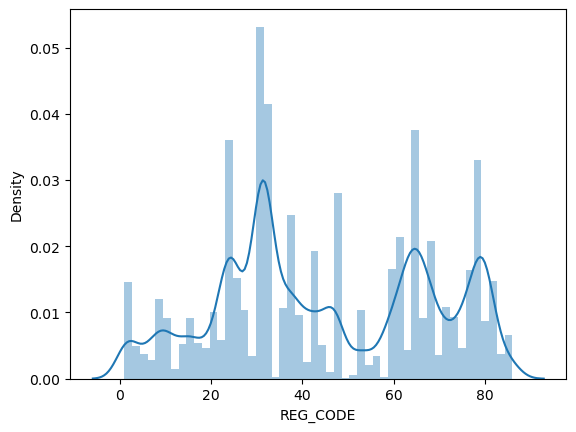

In [12]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    sns.distplot(df[col].dropna())
    plt.show()

In [13]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

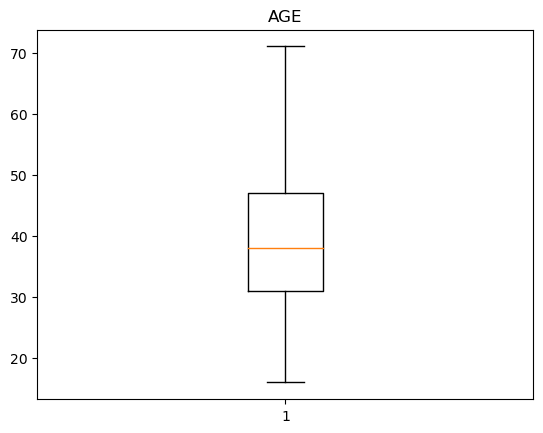

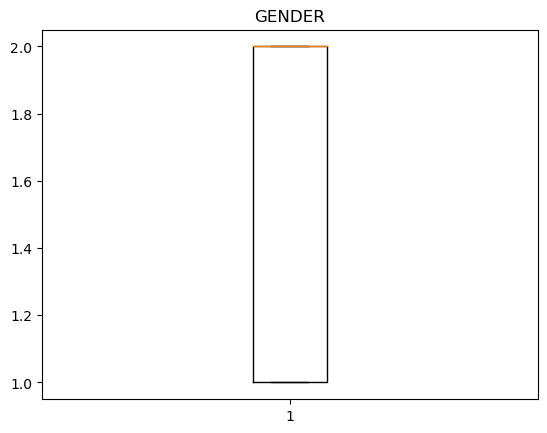

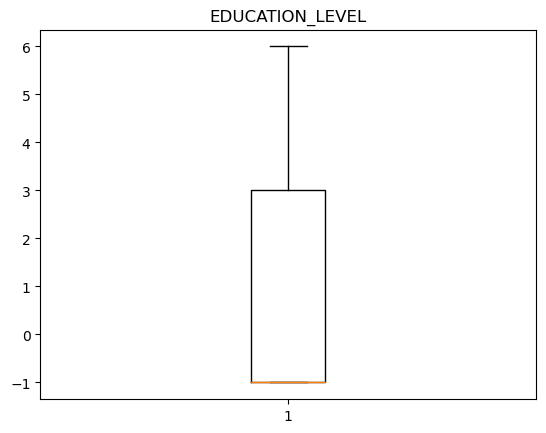

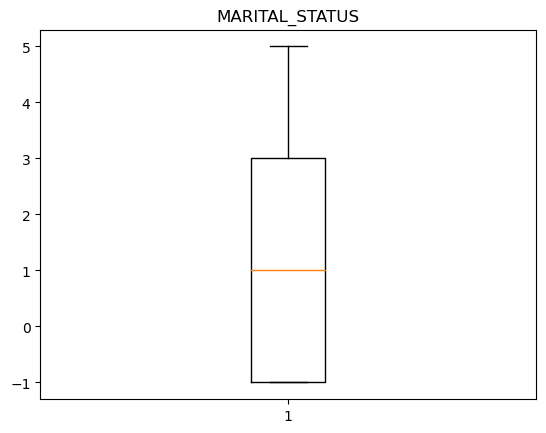

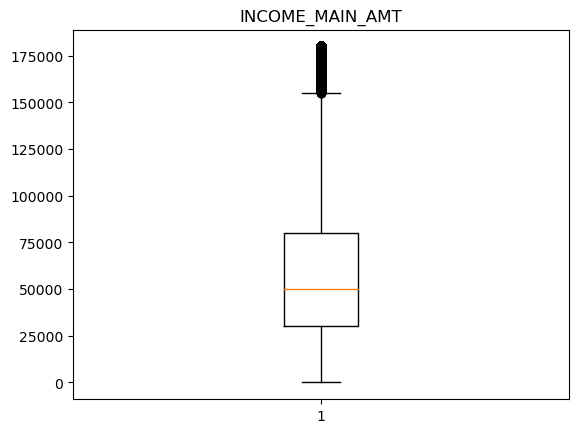

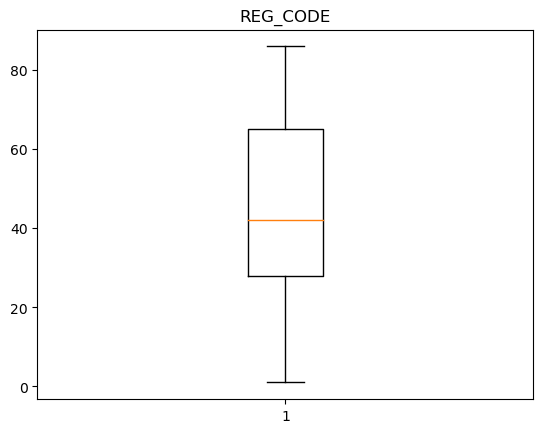

In [14]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

### 1.4 Формирование дополнительных атрибутов

Перевод из рублей в доллары

In [15]:
df['INCOME_MAIN_AMT_USD'] = df['INCOME_MAIN_AMT'].apply(lambda x: x / 80)

In [16]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD
0,35,2,3,3,87000.0,9.0,1087.5
1,34,2,3,3,180000.0,31.0,2250.0
2,35,1,1,3,61000.0,38.0,762.5
4,39,1,-1,3,34000.0,81.0,425.0
5,40,1,1,4,69000.0,81.0,862.5
...,...,...,...,...,...,...,...
103719,40,1,-1,-1,30000.0,32.0,375.0
103720,42,2,3,3,60000.0,62.0,750.0
103721,37,2,-1,4,68000.0,40.0,850.0
103722,44,2,1,1,58000.0,26.0,725.0


In [17]:
df3 = df2['LOCATION_NAME'].str.split('\\', 4 , expand= True )
df3.columns = ['shop', 'street', 'city', 'index']
df3

,shop,region,city,index
0,VERNYJ 1263,5A GORKOGO STR,SERPUKHOV,142203 RUSRUS
1,AVITO,7 LESNAYA STR,MOSCOW,125196 RUSRUS
2,STOLITSA,14 POBEDY PR-T,KOMSOM-NA-AMU,681029 RUSRUS
3,VERNYJ 1361,2 MIRA STR,RAMENSKOE,140105 RUSRUS
4,RESTORAN MGRILLCAFE.,LEVAYA STORONA 423-J KM AVTODOROGA MOSKV,NOVGORODSKAYA,174350 RUSRUS
...,...,...,...,...
12845070,NaN,NaN,NaN,NaN
12845071,NaN,NaN,NaN,NaN
12845072,NaN,NaN,NaN,NaN
12845073,NaN,NaN,NaN,NaN


In [18]:
df6 = pd.concat([df2, df3], axis=1)
df6 = df6.drop(['shop', 'street', 'LOCATION_NAME'], axis=1)
df6

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,region,city,index
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",5A GORKOGO STR,SERPUKHOV,142203 RUSRUS
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,7 LESNAYA STR,MOSCOW,125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",14 POBEDY PR-T,KOMSOM-NA-AMU,681029 RUSRUS
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",2 MIRA STR,RAMENSKOE,140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,LEVAYA STORONA 423-J KM AVTODOROGA MOSKV,NOVGORODSKAYA,174350 RUSRUS
...,...,...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN,NaN,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN,NaN,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN,NaN,NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN,NaN,NaN


In [19]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ID          int64 
 1   PROD_TYPE   int64 
 2   TRANS_DTTM  object
 3   MCC_CODE    int64 
 4   SUM_TRANS   object
 5   region      object
 6   city        object
 7   index       object
dtypes: int64(3), object(5)
memory usage: 784.0+ MB


In [22]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD
0,35,2,3,3,87000.0,9.0,1087.5
1,34,2,3,3,180000.0,31.0,2250.0
2,35,1,1,3,61000.0,38.0,762.5
4,39,1,-1,3,34000.0,81.0,425.0
5,40,1,1,4,69000.0,81.0,862.5
...,...,...,...,...,...,...,...
103719,40,1,-1,-1,30000.0,32.0,375.0
103720,42,2,3,3,60000.0,62.0,750.0
103721,37,2,-1,4,68000.0,40.0,850.0
103722,44,2,1,1,58000.0,26.0,725.0


### 1.5 Кластеризация

Подготовка данных
Отдельно возьму атрибуты, которые буду визуализировать

In [23]:
#Помещу их в переменную X
X = df[["AGE", "GENDER", "EDUCATION_LEVEL"]]

Я выбрал эти атрибуты, так как в зависимости от региона и категории товара (продовца) стоимость покупок будет разной и я считаю, что этих атрибутов будет достаточно что бы модель не имела проблем с переобучением и недообучением

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.


In [24]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

array([[0.34545455, 1.        , 0.57142857],
       [0.32727273, 1.        , 0.57142857],
       [0.34545455, 0.        , 0.28571429],
       ...,
       [0.38181818, 1.        , 0.        ],
       [0.50909091, 1.        , 0.28571429],
       [0.52727273, 0.        , 1.        ]])

#### PCA
Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

In [26]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

In [27]:
X

array([[-0.49219653,  0.23172796],
       [-0.49193264,  0.23049789],
       [ 0.52646395,  0.02405502],
       ...,
       [-0.44944836, -0.33425082],
       [-0.47293354, -0.04142087],
       [ 0.46973014,  0.74690436]])

#### Функция визуализации
Отдельно вынесу функцию для визуализации

In [55]:
#Функция для визуализации распределения 
def viz(prediction):
    #Размер фигуры
    plt.figure(figsize=(5, 5))
    #plt.subplot(224)
    #Выводить изображение буду при помощи scatter
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    #Вывод изображения
    plt.show()

#### Выбор алгоритмов (KMeans, MiniBatchKMeans, GaussianMixtures)
Я решил взять алгоритмы KMeans, MiniBatchKMeans и GaussianMixtures, так как они идеально подходят для такого набора данных, они сочетают в себе скорость работы, а так же качество кластеризации

#### KMeans

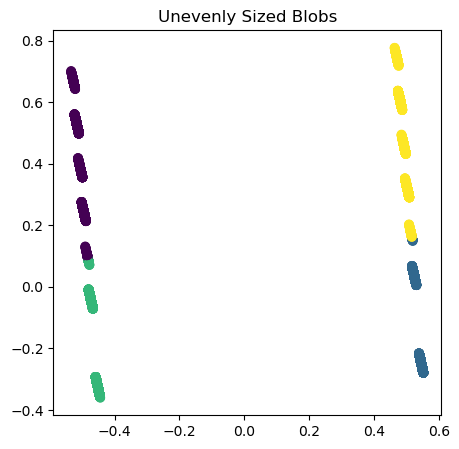

In [51]:
#Настройка параметров
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds

#Применяю функцию описаную выше
viz(df["KMCLUSTS"])

#### MiniBatchKMeans

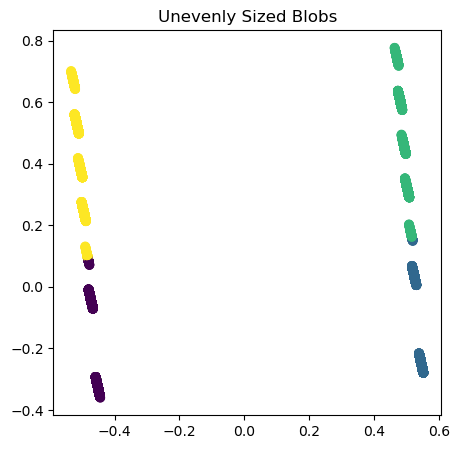

In [57]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
df["KBCLUSTS"] = kbmeans.fit_predict(X)

viz(df["KBCLUSTS"])

#### GaussianMixture

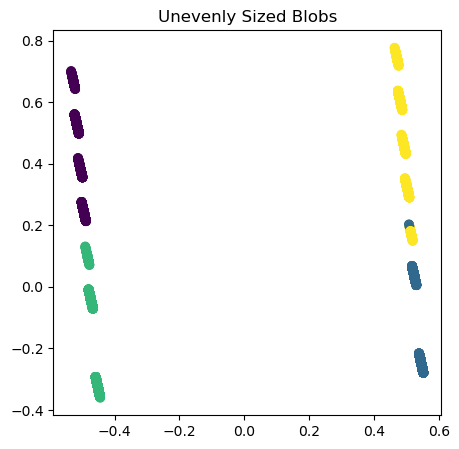

In [58]:
#Настройка параметров
gm = GaussianMixture(n_components=4, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
df["GMCLUSTS"] = gm

viz(df["GMCLUSTS"])

#### Результаты метрик

Calinski-Harabasz index
Представляет собой отношение суммы дисперсии между кластерами и межкластерной дисперсии для всех кластеров. Чем выше значение, тем лучше произведена кластеризация.

Davies-Bouldin index 
Показывает среднее «сходство» кластеров: расстояние между ними сравнивается с их размером. Чем меньше значение, тем лучше произведено разделение на кластеры.

##### Kmeans 

In [59]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KMCLUSTS"]))

729267.609999599
0.30910128140579984


##### MiniBatchKmeans


In [60]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KBCLUSTS"]))

729266.9754418622
0.3090519600778715


##### GussianMixture

In [61]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["GMCLUSTS"]))

728364.2083705545
0.30880148921481143


#### Решение
По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

In [ ]:
# Удаление ненужных атрибутов с кластерами
df.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

### 1.6 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [ ]:
# df.to_csv('output.csv', index=False, encoding='utf-8-sig') 

--------------

# Модуль 2

-------------

In [62]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# df = pd.read_csv('output.csv')

### 2.1 Разведочный анализ

In [63]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD,KMCLUSTS,KBCLUSTS,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,0,3,0
1,34,2,3,3,180000.0,31.0,2250.0,0,3,0
2,35,1,1,3,61000.0,38.0,762.5,1,1,1
4,39,1,-1,3,34000.0,81.0,425.0,1,1,1
5,40,1,1,4,69000.0,81.0,862.5,1,1,1


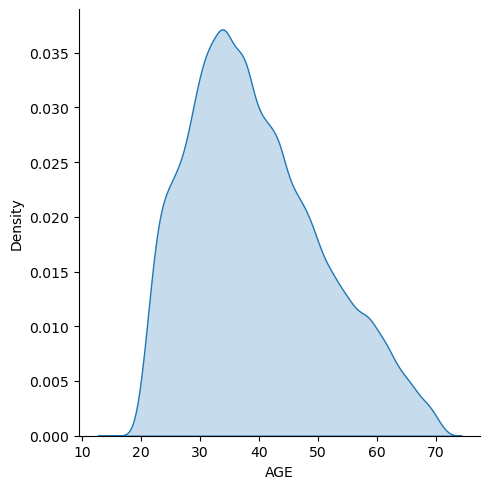

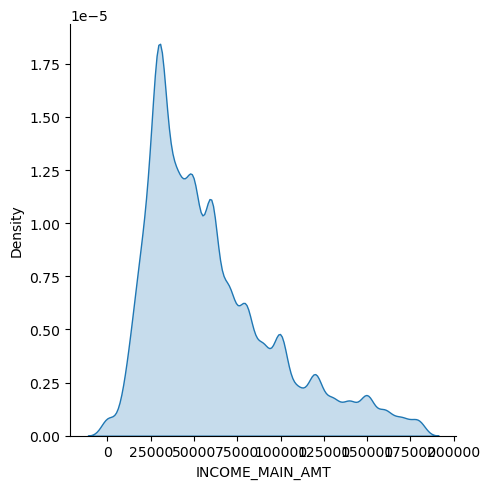

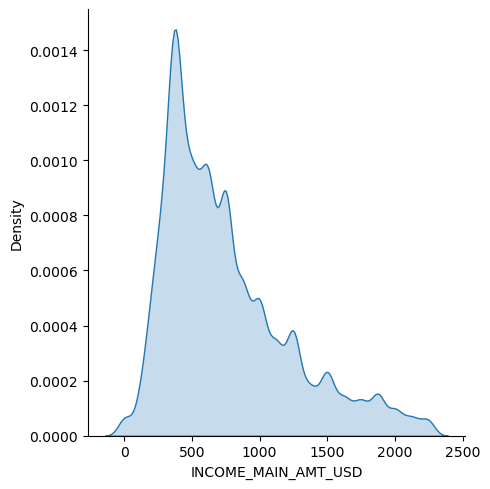

In [64]:
#Лист с признаками которые не будут учитываться при визуализации (Не категориальные)
skip = ['AGE', 'INCOME_MAIN_AMT', 'INCOME_MAIN_AMT_USD']
#Не категориальные признаки
for i in skip:
    if type(df[i].iloc[2]) == np.int64 or type(df[i].iloc[2]) == np.float64:
        sns.displot(df, x=i, kind="kde", fill=True)

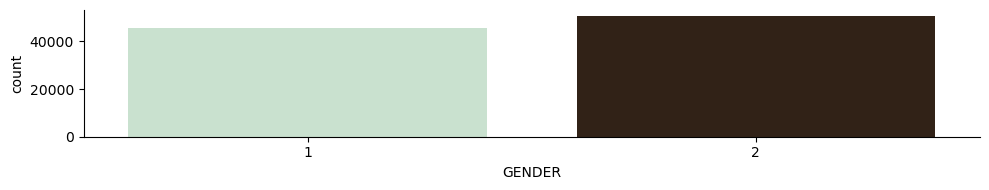

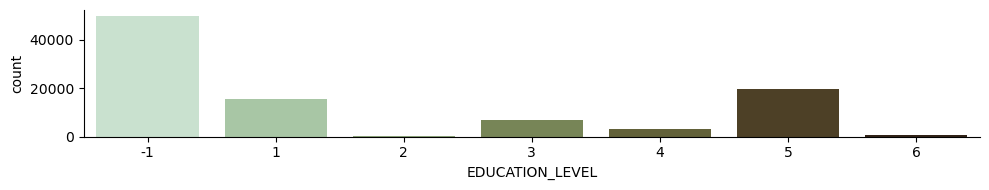

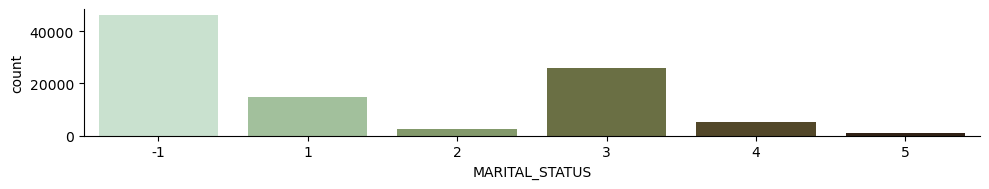

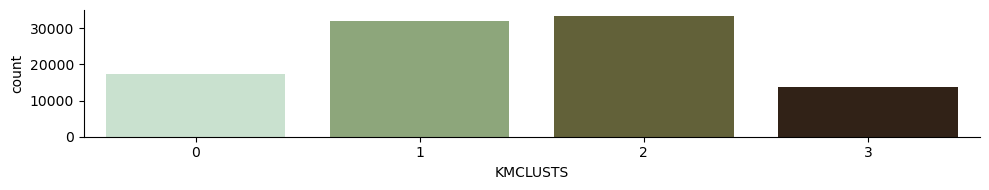

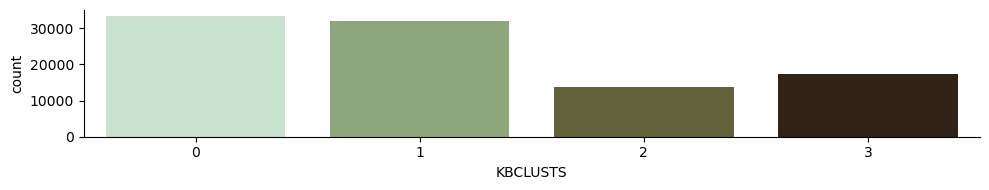

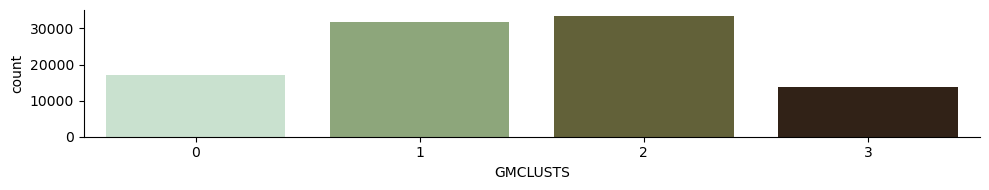

In [65]:
#Категориальные признаки
for i in df.columns:
    if i not in skip and i != 'REG_CODE':
        sns.catplot(x=i, kind='count', palette='ch:25', height=2, aspect=5, data=df)
        plt.show()

REG_CODE плохо визуализировался, так что его можно вывести отдельно

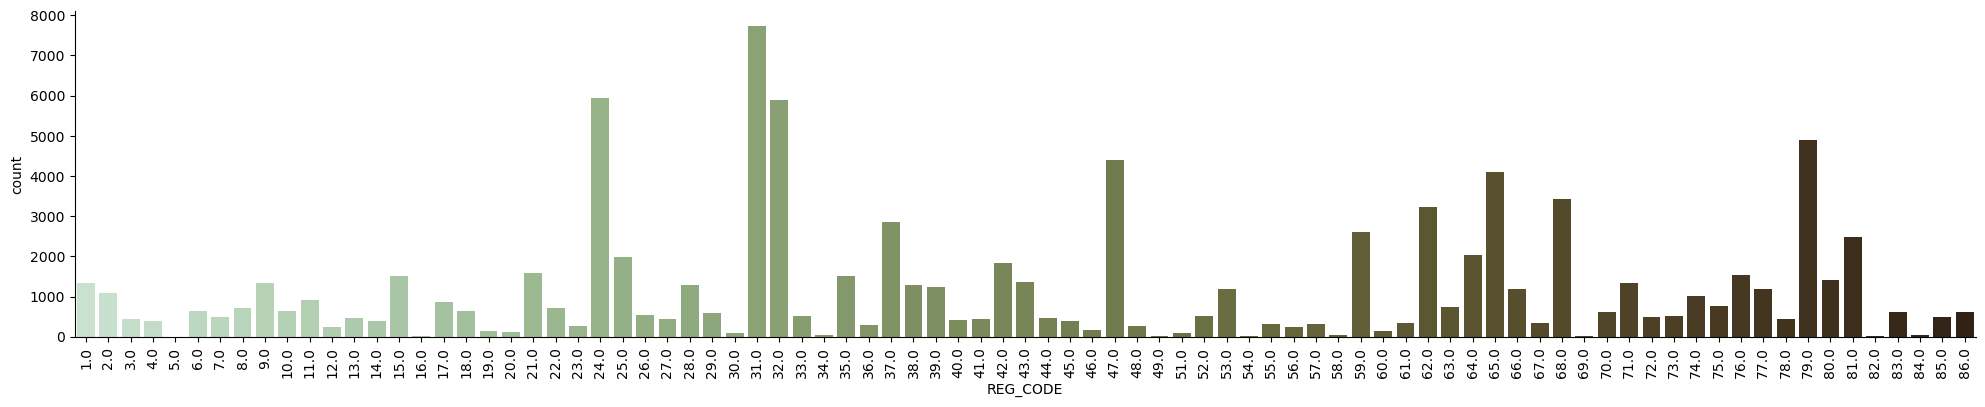

In [66]:
sns.catplot(x='REG_CODE', kind='count', palette='ch:25', height=4, aspect=5, data=df)
plt.xticks(rotation=90)
plt.show()

### 2.2 Разбиение выборки

In [ ]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,0
1,34,2,3,3,180000.0,31.0,2250.0,0
2,35,1,1,3,61000.0,38.0,762.5,1
4,39,1,-1,3,34000.0,81.0,425.0,1
5,40,1,1,4,69000.0,81.0,862.5,1


Система рекомендаций будет определять категорию принадлежности, то есть порекомендовать пользователю товар для мужчин или для женщин

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [ ]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [ ]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS"]]
y = df["GENDER"]

In [ ]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

#### KNN

In [ ]:
#Объявление классификатор
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier()

#### GaussianNB

In [ ]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

#### LogisticRegression

In [ ]:
#Объявление классификатор
clf = LogisticRegression()
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression()

#### Метрики
Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

#### KNN

In [ ]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97     13677
           2       0.97      0.98      0.97     15180

    accuracy                           0.97     28857
   macro avg       0.97      0.97      0.97     28857
weighted avg       0.97      0.97      0.97     28857



#### GaussianNB

In [ ]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857



#### LogisticRegression

In [ ]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857



#### Решение
По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99. В то время как остальные алгоритмы показали 1, что может оказаться переобучением.

### 2.3 Оптимизация модели

#### Генерация новых данных

In [ ]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_USD,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,0
1,34,2,3,3,180000.0,31.0,2250.0,0
2,35,1,1,3,61000.0,38.0,762.5,1
4,39,1,-1,3,34000.0,81.0,425.0,1
5,40,1,1,4,69000.0,81.0,862.5,1


В данном случае можно воспользоваться уже созданным нами атрибутом INCOME_MAIN_AMT_USD

In [ ]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [ ]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS", 'INCOME_MAIN_AMT_USD']]
y = df["GENDER"]

In [ ]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

In [ ]:
#Объявление классификатор
neigh2 = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neigh2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### Метрика

In [ ]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.59      0.84      0.69     13677
           2       0.76      0.47      0.58     15180

    accuracy                           0.64     28857
   macro avg       0.68      0.65      0.64     28857
weighted avg       0.68      0.64      0.63     28857



Модель стала хуже, так что для дальнейшего использования лучше будет оставить первую версию

#### Сохранение лучшей модели

Ниже представлен код сохранения модели

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(neigh, open(filename, 'wb'))

Так выглядит загрузка модели

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

### 2.4 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [ ]:
# df.to_csv('output2.csv', index=False, encoding='utf-8-sig')